In [1]:
import numpy as np
#import pandas as pd

from datascience import *


%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import locale

Load Sales data and remove invalid rows

In [9]:

sales_2017 = Table.read_table("2017_manhattan.csv")

sales_2017 = sales_2017.where(1, are.not_equal_to('nan'))
# sales_2017.show(3)
# Convert string numbers to ints
def strToInt(strValue):
    return int(strValue.replace(',',''))

# Replace Price Column with Ints
sales_2017 = sales_2017.with_column('PRICE', sales_2017.apply(strToInt, "SALE PRICE\r")).drop("SALE PRICE\r")


In [14]:
sales_2017 = sales_2017.where('PRICE', are.above(0)).sort('SALE DATE\r', descending=True)


In [24]:
sales_2017.where('YEAR BUILT\r', are.below(1000))

BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 17/18,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL 17/18,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,PRICE
1,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,,1171,4739,,,1 WEST END AVENUE,,10023,0,0,0,-,-,0,2,R4,9/8/17,3299130
1,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,,1171,4727,,,1 WEST END AVENUE,,10023,0,0,0,-,-,0,2,R4,9/8/17,3139699
1,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1171,1524,,R4,220 RIVERSIDE BOULEVARD,32C,10069,1,0,1,-,-,0,2,R4,9/8/17,2250000
1,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1171,1488,,R4,220 RIVERSIDE BOULEVARD,41B,10069,1,0,1,-,-,0,2,R4,9/8/17,2500000
1,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1138,1363,,R4,1965 BROADWAY,20F,10023,1,0,1,-,-,0,2,R4,9/8/17,1515000
1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1329,1013,,R4,231 EAST 55TH STREET,36C,10022,1,0,1,-,-,0,2,R4,9/8/17,1209000
1,KIPS BAY,17 CONDO COOPS,2,945,1003,,R9,"300 EAST 40TH STREET, 25S",,10016,0,0,0,-,-,0,2,R9,9/8/17,1033333
1,KIPS BAY,13 CONDOS - ELEVATOR APARTMENTS,2,943,1551,,R4,330 EAST 38TH STREET,38P,10016,1,0,1,-,-,0,2,R4,9/8/17,1450000
1,HARLEM-CENTRAL,12 CONDOS - WALKUP APARTMENTS,2,1826,1101,,R2,220 WEST 111TH STREET,1A,10026,1,0,1,-,-,0,2,R2,9/8/17,700000
1,UPPER WEST SIDE (59-79),45 CONDO HOTELS,4,1138,1590,,RH,155 WEST 66TH STREET,1029,10023,0,0,1,-,-,0,4,RH,9/7/17,325000


('BOROUGH\r',
 'NEIGHBORHOOD\r',
 'BUILDING CLASS CATEGORY\r',
 'TAX CLASS AS OF FINAL ROLL 17/18',
 'BLOCK\r',
 'LOT\r',
 'EASE-MENT\r',
 'BUILDING CLASS AS OF FINAL ROLL 17/18',
 'ADDRESS\r',
 'APARTMENT NUMBER\r',
 'ZIP CODE\r',
 'RESIDENTIAL UNITS\r',
 'COMMERCIAL UNITS\r',
 'TOTAL UNITS\r',
 'LAND SQUARE FEET\r',
 'GROSS SQUARE FEET\r',
 'YEAR BUILT\r',
 'TAX CLASS AT TIME OF SALE\r',
 'BUILDING CLASS AT TIME OF SALE\r',
 'SALE DATE\r',
 'PRICE')

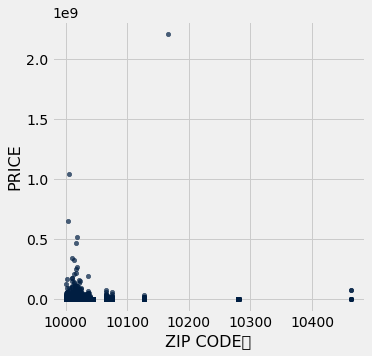

In [31]:
sales_2017.where('ZIP CODE\r', are.above(0)).scatter( 'ZIP CODE\r', 'PRICE')
sales_2017.labels


In [37]:
sales_2017.group('ADDRESS\r').sort(1, descending=True)

ADDRESS,count
1 WEST END AVENUE,136
50 WEST STREET,129
389 EAST 89TH STREET,111
30 PARK PLACE,70
56 LEONARD STREET,68
171 WEST 131 STREET,61
140 WEST STREET,58
330 EAST 38TH STREET,55
385 1 AVENUE,52
45 EAST 22ND STREET,51


Visualize sales by neighborhood
==================

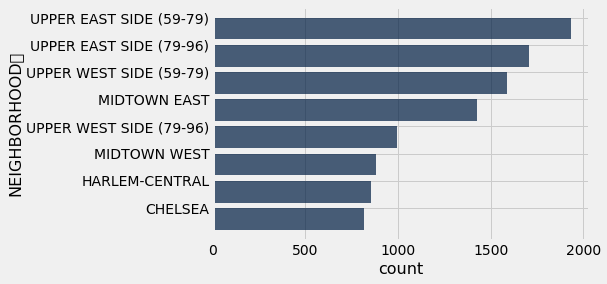

In [64]:
sales_by_hood = sales_2017.select(1).group(0)
sales_by_hood = sales_by_hood.sort('count', descending=True)
# sales_by_hood.show(5)
sales_by_hood.where(1, are.above(800) ).barh(0)


Visualise sales by Building Class
==================

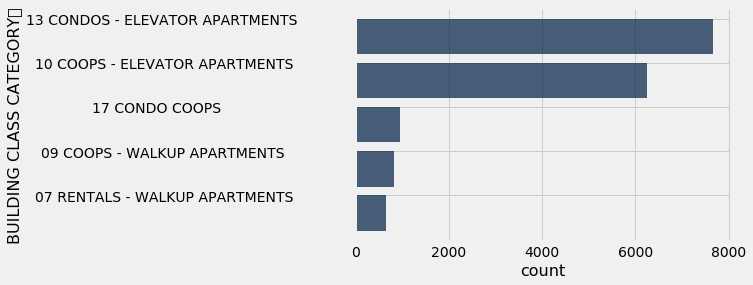

In [113]:
sales_by_bldg_class = sales_2017.select(2).group(0)
sales_by_bldg_class = sales_by_bldg_class.sort('count', descending=True)
# sales_by_bldg_class
sales_by_bldg_class.take(np.arange(0,5)).barh(0)



In [88]:
# Midtown coop sales
midtown_coops = sales_2017.where(2, are.containing('10 COOPS')).where(1, are.containing('MIDTOWN'))
midtown_coops.sort("GROSS SQUARE FEET\r", descending=True).show(3)
